In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import json
import requests

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [23]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e99e4875a6b849c43b245f3ff50fcaf


In [25]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities. This code includes a try-except block
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mayo
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | vardo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | tahta
Processing Record 9 of Set 1 | qui nhon
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | marsa matruh
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | lufilufi
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | shupiyan
Processing Record 22 of Set 1 | ahumada
City not found. Skipping...
Processing Record

Processing Record 38 of Set 4 | norman wells
Processing Record 39 of Set 4 | bilma
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | nanchang
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | kayerkan
Processing Record 45 of Set 4 | rio branco
Processing Record 46 of Set 4 | hoquiam
Processing Record 47 of Set 4 | naryan-mar
Processing Record 48 of Set 4 | burica
City not found. Skipping...
Processing Record 49 of Set 4 | moses lake
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | waipawa
Processing Record 2 of Set 5 | savannah bight
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | bouna
Processing Record 7 of Set 5 | hermagor
Processing Record 8 of Set 5 | maumere
Processing Record 9 of Set 5 | ixtapa
Processing Record 10 of Set 5 | mossendjo
Process

Processing Record 28 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 29 of Set 8 | avera
Processing Record 30 of Set 8 | vostok
Processing Record 31 of Set 8 | port hardy
Processing Record 32 of Set 8 | saint anthony
Processing Record 33 of Set 8 | itaituba
Processing Record 34 of Set 8 | mareeba
Processing Record 35 of Set 8 | palana
Processing Record 36 of Set 8 | meulaboh
Processing Record 37 of Set 8 | vysokogornyy
Processing Record 38 of Set 8 | sarasota
Processing Record 39 of Set 8 | souillac
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | saleaula
City not found. Skipping...
Processing Record 42 of Set 8 | flin flon
Processing Record 43 of Set 8 | zhezkazgan
Processing Record 44 of Set 8 | falealupo
City not found. Skipping...
Processing Record 45 of Set 8 | nantucket
Processing Record 46 of Set 8 | fort wellington
Processing Record 47 of Set 8 | salta
Processing Record 48 of Set 8 | narsaq
Processing Record 49 of Set 8 | vanimo
Processi

Processing Record 15 of Set 12 | lolua
City not found. Skipping...
Processing Record 16 of Set 12 | tsotilion
Processing Record 17 of Set 12 | whitianga
Processing Record 18 of Set 12 | rungata
City not found. Skipping...
Processing Record 19 of Set 12 | tatawin
Processing Record 20 of Set 12 | inhambane
Processing Record 21 of Set 12 | homer
Processing Record 22 of Set 12 | sanpaul
Processing Record 23 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 24 of Set 12 | zaragoza
Processing Record 25 of Set 12 | ornskoldsvik
Processing Record 26 of Set 12 | epe
Processing Record 27 of Set 12 | el estor
Processing Record 28 of Set 12 | jackson
Processing Record 29 of Set 12 | sao gabriel da cachoeira
Processing Record 30 of Set 12 | vitim
Processing Record 31 of Set 12 | lieksa
Processing Record 32 of Set 12 | warqla
City not found. Skipping...
Processing Record 33 of Set 12 | mweka
Processing Record 34 of Set 12 | lasa
Processing Record 35 of Set 12 | yanliang
Processing R

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mayo,38.8876,-76.5119,47.48,87,100,4.61,US,2022-12-11 20:10:48
1,Vaini,-21.2000,-175.2000,78.96,83,75,13.80,TO,2022-12-11 20:10:49
2,Severo-Kurilsk,50.6789,156.1250,26.62,59,95,22.53,RU,2022-12-11 20:10:49
3,Punta Arenas,-53.1500,-70.9167,53.71,54,0,6.91,CL,2022-12-11 20:08:30
4,Vardo,70.3705,31.1107,24.78,93,75,11.50,NO,2022-12-11 20:10:49
5,Rikitea,-23.1203,-134.9692,76.50,77,31,18.79,PF,2022-12-11 20:09:24
6,Hobart,-42.8794,147.3294,57.06,96,75,5.75,AU,2022-12-11 20:07:05
7,Tahta,26.7693,31.5021,64.35,30,0,3.74,EG,2022-12-11 20:10:50
8,Qui Nhon,13.7667,109.2333,71.65,83,98,10.69,VN,2022-12-11 20:10:50
9,Butaritari,3.0707,172.7902,80.47,74,21,12.03,KI,2022-12-11 20:10:50


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayo,US,2022-12-11 20:10:48,38.8876,-76.5119,47.48,87,100,4.61
1,Vaini,TO,2022-12-11 20:10:49,-21.2000,-175.2000,78.96,83,75,13.80
2,Severo-Kurilsk,RU,2022-12-11 20:10:49,50.6789,156.1250,26.62,59,95,22.53
3,Punta Arenas,CL,2022-12-11 20:08:30,-53.1500,-70.9167,53.71,54,0,6.91
4,Vardo,NO,2022-12-11 20:10:49,70.3705,31.1107,24.78,93,75,11.50
5,Rikitea,PF,2022-12-11 20:09:24,-23.1203,-134.9692,76.50,77,31,18.79
6,Hobart,AU,2022-12-11 20:07:05,-42.8794,147.3294,57.06,96,75,5.75
7,Tahta,EG,2022-12-11 20:10:50,26.7693,31.5021,64.35,30,0,3.74
8,Qui Nhon,VN,2022-12-11 20:10:50,13.7667,109.2333,71.65,83,98,10.69
9,Butaritari,KI,2022-12-11 20:10:50,3.0707,172.7902,80.47,74,21,12.03


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1670790322.9245524

In [32]:
city_data_df.isnull().sum()

City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [33]:
city_data_df.dtypes

City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

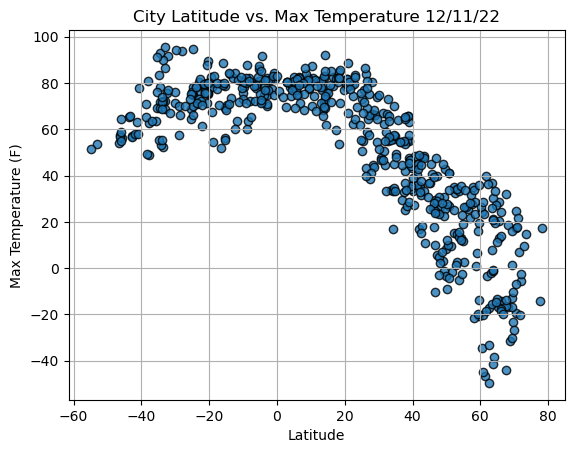

In [34]:
#6.3.1 this creates a scatter plot
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

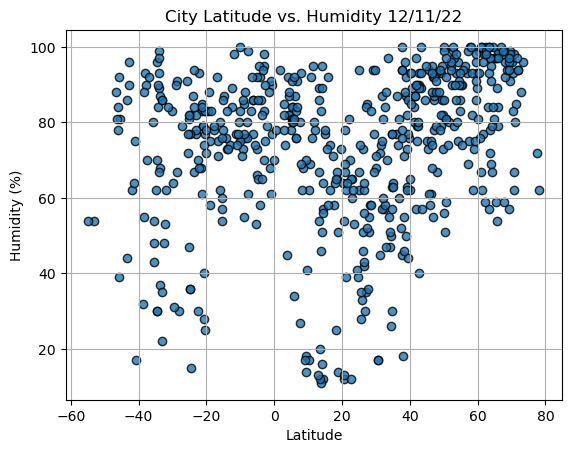

In [35]:
#6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

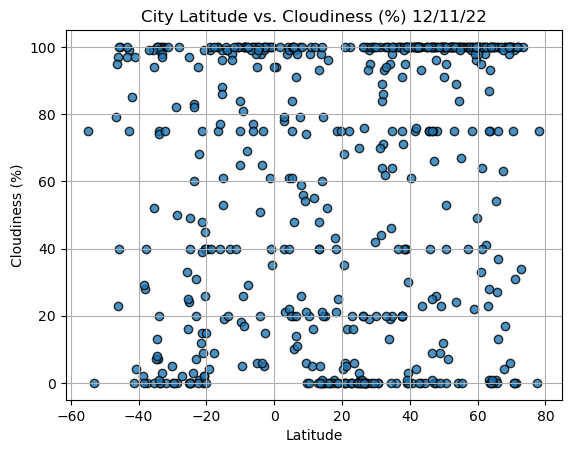

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

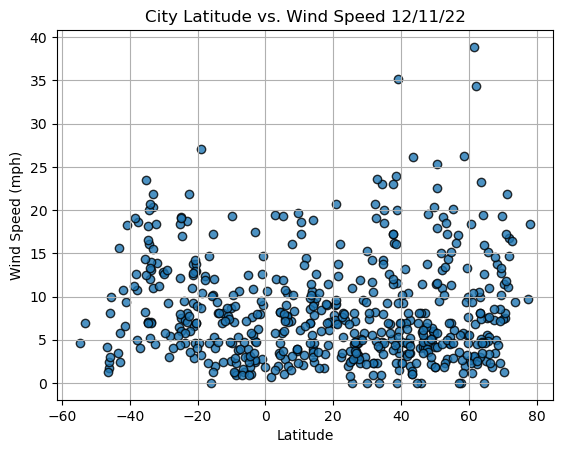

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [54]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

SyntaxError: invalid syntax (2317673131.py, line 3)

In [66]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [127]:
#6.4.2 multiple linear regressions
#xvaules is Lat
#yvalues is the indpendent variable

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [115]:
#this code pulls the info from row(index)13, this could be replicated with any
# line
index13 = city_data_df.loc[13]
index13

City                   Georgetown
Country                        MY
Date          2022-12-11 20:10:51
Lat                        5.4112
Lng                      100.3354
Max Temp                     79.9
Humidity                       84
Cloudiness                     20
Wind Speed                   1.01
Name: 13, dtype: object

In [116]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
553     True
554    False
555     True
556     True
557    False
Name: Lat, Length: 558, dtype: bool

In [117]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayo,US,2022-12-11 20:10:48,38.8876,-76.5119,47.48,87,100,4.61
2,Severo-Kurilsk,RU,2022-12-11 20:10:49,50.6789,156.1250,26.62,59,95,22.53
4,Vardo,NO,2022-12-11 20:10:49,70.3705,31.1107,24.78,93,75,11.50
7,Tahta,EG,2022-12-11 20:10:50,26.7693,31.5021,64.35,30,0,3.74
8,Qui Nhon,VN,2022-12-11 20:10:50,13.7667,109.2333,71.65,83,98,10.69
...,...,...,...,...,...,...,...,...,...
551,Matara,LK,2022-12-11 20:24:21,5.9485,80.5353,74.93,92,100,7.16
552,Emba,KZ,2022-12-11 20:24:22,48.8264,58.1442,7.05,78,0,5.10
553,Lehigh Acres,US,2022-12-11 20:24:22,26.6254,-81.6248,80.64,62,0,3.44
555,Taybad,IR,2022-12-11 20:25:22,34.7400,60.7756,33.37,57,100,3.29


In [118]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayo,US,2022-12-11 20:10:48,38.8876,-76.5119,47.48,87,100,4.61
2,Severo-Kurilsk,RU,2022-12-11 20:10:49,50.6789,156.1250,26.62,59,95,22.53
4,Vardo,NO,2022-12-11 20:10:49,70.3705,31.1107,24.78,93,75,11.50
7,Tahta,EG,2022-12-11 20:10:50,26.7693,31.5021,64.35,30,0,3.74
8,Qui Nhon,VN,2022-12-11 20:10:50,13.7667,109.2333,71.65,83,98,10.69


In [119]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [120]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayo,US,2022-12-11 20:10:48,38.8876,-76.5119,47.48,87,100,4.61
2,Severo-Kurilsk,RU,2022-12-11 20:10:49,50.6789,156.1250,26.62,59,95,22.53
4,Vardo,NO,2022-12-11 20:10:49,70.3705,31.1107,24.78,93,75,11.50
7,Tahta,EG,2022-12-11 20:10:50,26.7693,31.5021,64.35,30,0,3.74
8,Qui Nhon,VN,2022-12-11 20:10:50,13.7667,109.2333,71.65,83,98,10.69


In [121]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vaini,TO,2022-12-11 20:10:49,-21.2000,-175.2000,78.96,83,75,13.80
3,Punta Arenas,CL,2022-12-11 20:08:30,-53.1500,-70.9167,53.71,54,0,6.91
5,Rikitea,PF,2022-12-11 20:09:24,-23.1203,-134.9692,76.50,77,31,18.79
6,Hobart,AU,2022-12-11 20:07:05,-42.8794,147.3294,57.06,96,75,5.75
15,Lufilufi,WS,2022-12-11 20:10:51,-13.8745,-171.5986,83.98,73,99,8.12


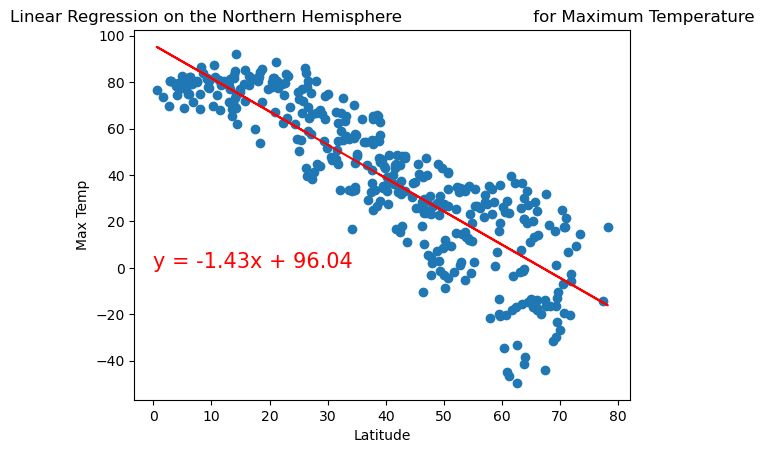

In [133]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,0))

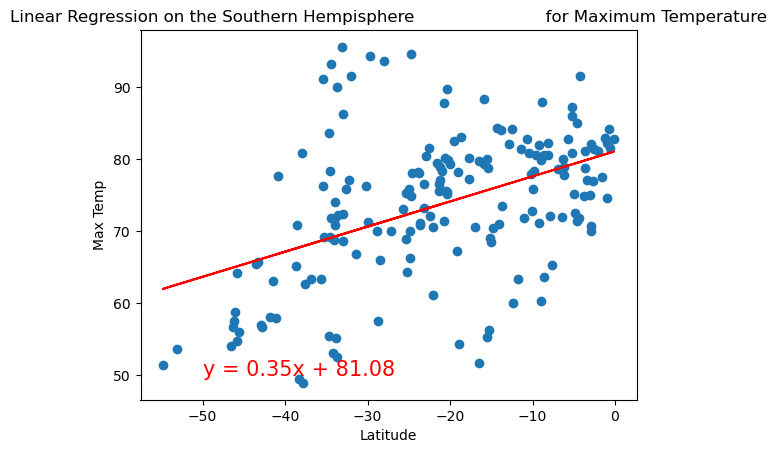

In [142]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hempisphere \
                        for Maximum Temperature', 'Max Temp',(-50,50))

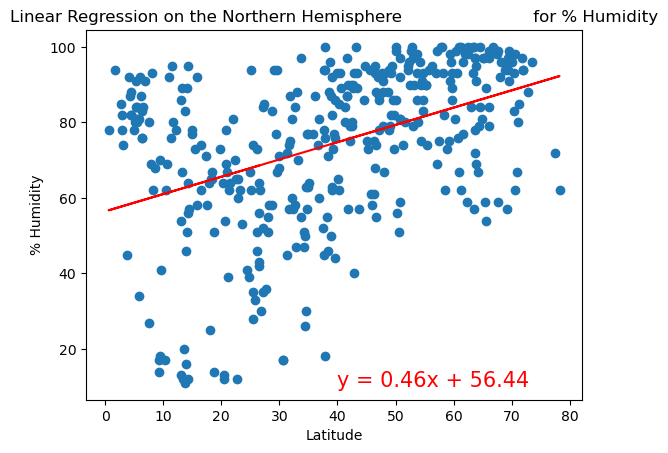

In [143]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

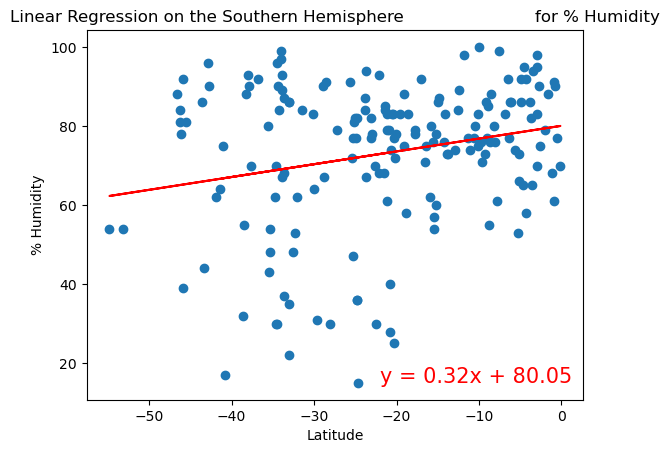

In [147]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-22,15))

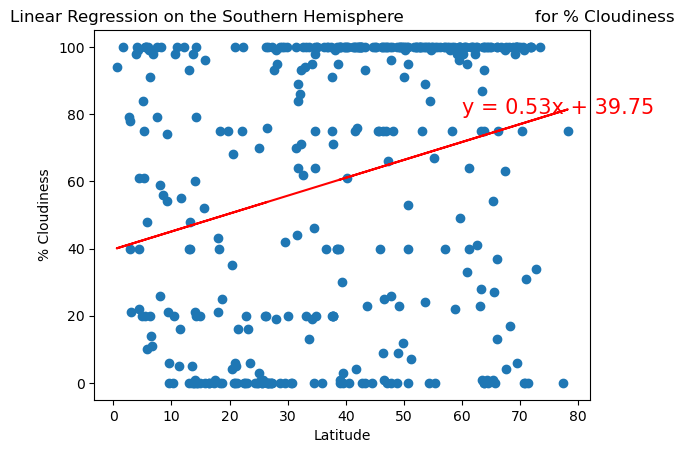

In [150]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(60,80))

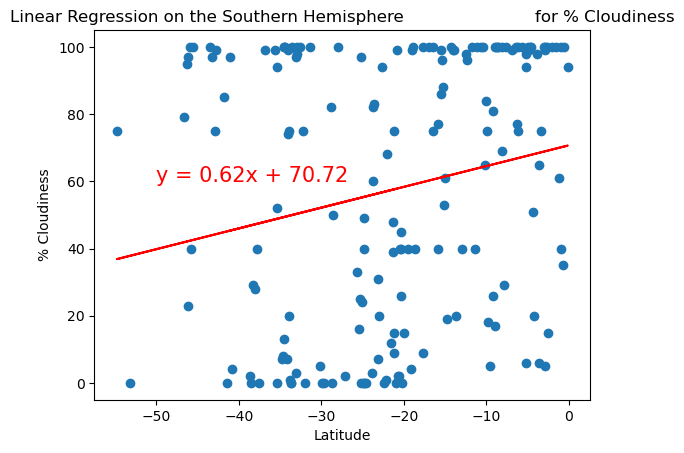

In [151]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

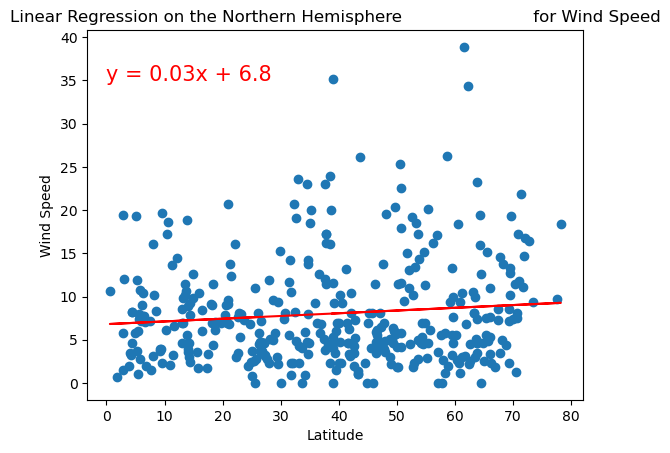

In [155]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,35))

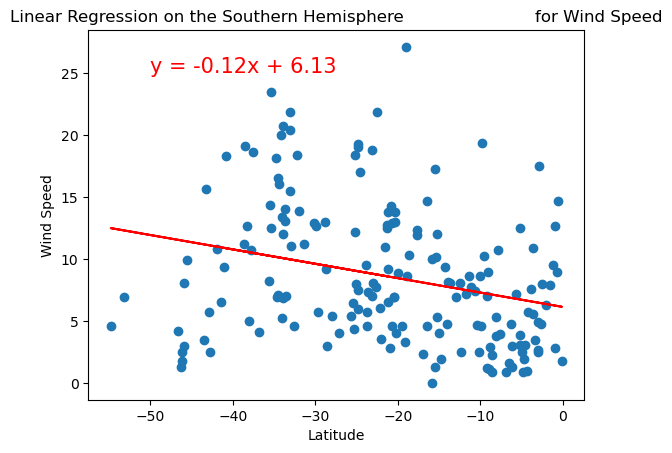

In [154]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))